##Electric current drive signals

https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis#

Features are extracted from electric current drive signals. The drive has intact and defective components. This results in 11 different classes with different conditions. Each condition has been measured several times by 12 different operating conditions, this means by different speeds, load moments and load forces. The current signals are measured with a current probe and an oscilloscope on two phases.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
# Import data
df = pd.read_csv('Sensorless_drive_diagnosis.txt', sep = ' ', header = None)
# Print first 10 samples
print(df.sample(10))


                 0         1             2             3         4   \
27671 -7.773000e-06  0.000008  6.660500e-05 -1.530300e-06  0.000016   
57885 -1.970800e-05  0.000039  7.629500e-05 -1.906700e-06  0.000064   
3154  -1.002400e-05  0.000025  3.199800e-04 -3.375900e-06  0.000029   
38786 -4.023100e-06  0.000019  2.110600e-06 -1.343000e-06 -0.000042   
36684  6.184000e-06  0.000044  1.082500e-05  9.665100e-06  0.000151   
2095  -8.326800e-06  0.000021  3.528200e-08 -6.573900e-07  0.000008   
2527  -2.005500e-06  0.000080  2.148400e-04 -4.327700e-06  0.000062   
2072   5.891700e-06  0.000028  1.554300e-05 -1.015300e-05  0.000065   
16842  1.929100e-08 -0.000017 -3.147900e-06  6.683000e-07  0.000004   
43766 -5.728500e-06 -0.000022  1.879300e-05  3.662600e-08  0.000054   

                 5         6         7         8         9   ...       39  \
27671  2.548200e-05  0.014054  0.014047  0.013980 -0.028926  ... -0.65325   
57885 -1.781600e-03 -0.077992 -0.078031 -0.078107 -0.181320  ...

In [3]:
# Check missing values
print(df.isna().sum())
# Remove missing values IF AVAILABLE and print first 10 samples
# df = df.dropna()
# print(df.head(10))
# print(df.shape)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(58509, 48)
(58509,)


In [5]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
20772,-1.066300e-05,0.000056,0.000069,-2.602300e-05,0.000051,-0.000253,0.026394,0.026338,0.026269,0.036676,...,-0.51328,1.822100,6.3095,-1.5032,-1.5031,-1.5029,-1.4927,-1.4928,-1.4929,4
26206,-7.362800e-06,-0.000024,-0.000238,-2.382700e-05,0.000012,0.000712,0.030384,0.030408,0.030646,0.019052,...,-0.53025,3.369400,9.0033,-1.5018,-1.5019,-1.5017,-1.4948,-1.4947,-1.4947,5
49629,-4.850000e-06,0.000061,-0.000053,-8.463700e-06,0.000007,0.000107,-0.030411,-0.030471,-0.030419,-0.017558,...,-0.72027,19.264000,12.2820,-1.5006,-1.5006,-1.5004,-1.4991,-1.4991,-1.4992,10
13267,9.712400e-06,0.000071,-0.000280,-1.313600e-05,0.000018,-0.000046,0.008116,0.008045,0.008325,0.019697,...,-0.68066,-0.025324,5.3903,-1.5061,-1.5062,-1.5060,-1.4989,-1.4990,-1.4988,3
36657,1.020900e-05,0.000059,0.000074,6.746200e-06,-0.000056,-0.000048,0.048857,0.048798,0.048724,0.098084,...,-0.58116,15.426000,11.3060,-1.5060,-1.5060,-1.5060,-1.4972,-1.4975,-1.4971,7
22950,2.284000e-06,-0.000030,-0.000106,-6.166700e-07,-0.000012,-0.000147,0.018461,0.018490,0.018597,0.013636,...,-0.76486,12.454000,11.9950,-1.5006,-1.5006,-1.5007,-1.4973,-1.4973,-1.4973,5
56934,-9.648900e-06,-0.000022,-0.000143,5.601000e-06,-0.000024,-0.000042,-0.099712,-0.099690,-0.099547,-0.136510,...,-0.61078,0.169550,7.3184,-1.5054,-1.5056,-1.5057,-1.5003,-1.5003,-1.5003,11
2115,-8.626500e-06,0.000028,0.000017,-4.339900e-06,0.000009,-0.000014,0.021700,0.021673,0.021656,-0.046297,...,-0.78866,10.762000,6.7168,-1.5006,-1.5006,-1.5004,-1.4999,-1.5000,-1.4999,1
54771,-1.532000e-06,0.000003,-0.000089,4.352400e-06,-0.000029,0.000037,-0.083304,-0.083307,-0.083218,-0.205290,...,-0.75170,2.742900,8.8654,-1.4990,-1.4989,-1.4990,-1.5003,-1.5003,-1.5003,11
35995,-6.981700e-07,-0.000003,-0.000111,1.062400e-05,0.000019,-0.000195,0.030957,0.030960,0.031070,0.099791,...,-0.59798,0.885840,7.8465,-1.5004,-1.5004,-1.5002,-1.5012,-1.5012,-1.5009,7


In [6]:
y.value_counts()

1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
Name: 48, dtype: int64

In [7]:
y = y - 1

In [8]:
y.value_counts()

0     5319
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
Name: 48, dtype: int64

In [9]:
y_onehot = pd.get_dummies(y)

In [10]:
y_onehot

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58504,0,0,0,0,0,0,0,0,0,0,1
58505,0,0,0,0,0,0,0,0,0,0,1
58506,0,0,0,0,0,0,0,0,0,0,1
58507,0,0,0,0,0,0,0,0,0,0,1


Dividimos en 3 datasets: entrenamiento, validación y test:

In [11]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

In [12]:
print('Entrada entrenamiento: ', X_train.shape)
print('Salida entrenamiento: ', y_train.shape)
print('Entrada validación: ', X_val.shape)
print('Salida validación: ', y_val.shape)
print('Entrada test: ', X_test.shape)
print('Salida test: ', y_test.shape)

Entrada entrenamiento:  (37445, 48)
Salida entrenamiento:  (37445, 11)
Entrada validación:  (9362, 48)
Salida validación:  (9362, 11)
Entrada test:  (11702, 48)
Salida test:  (11702, 11)


Normalizamos los features

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

**PREGUNTA**
1. Construye una red neuronal para clasificar los motores con dos capas ocultas, de 15 neuronas cada una y función de activación 'relu'
2. ¿Cuántos parámetros tiene que calcaular el modelo?

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(15, activation='relu', input_dim=(X_train_std.shape[1])),  # Capa oculta 1
    Dense(15, activation='relu'),  # Capa oculta 2
    Dense(11, activation='softmax') ])  # Capa de salida

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                735       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 11)                176       
                                                                 
Total params: 1151 (4.50 KB)
Trainable params: 1151 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**PREGUNTA**
3. Compila y entrena el modelo con 20 épocas y tamaño de batch de 10. Optimizador 'adam'

In [15]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy')
history_data = modelo.fit(X_train_std, y_train, epochs=20, validation_split=0.2, batch_size=10)


Epoch 1/20
2996/2996 [==============================] - 9s 3ms/step - loss: 0.8675 - val_loss: 0.2987
Epoch 2/20
2996/2996 [==============================] - 7s 2ms/step - loss: 0.2305 - val_loss: 0.1707
Epoch 3/20
2996/2996 [==============================] - 8s 3ms/step - loss: 0.1658 - val_loss: 0.1362
Epoch 4/20
2996/2996 [==============================] - 8s 3ms/step - loss: 0.1400 - val_loss: 0.1303
Epoch 5/20
2996/2996 [==============================] - 6s 2ms/step - loss: 0.1243 - val_loss: 0.1089
Epoch 6/20
2996/2996 [==============================] - 8s 3ms/step - loss: 0.1112 - val_loss: 0.0990
Epoch 7/20
2996/2996 [==============================] - 7s 2ms/step - loss: 0.1007 - val_loss: 0.0914
Epoch 8/20
2996/2996 [==============================] - 7s 2ms/step - loss: 0.0949 - val_loss: 0.0876
Epoch 9/20
2996/2996 [==============================] - 6s 2ms/step - loss: 0.0873 - val_loss: 0.0842
Epoch 10/20
2996/2996 [==============================] - 7s 2ms/step - loss: 0.079

**PREGUNTA**
4. Dibuja la gráfica de la función de pérdida de los datasets de entrenamiento y validación.

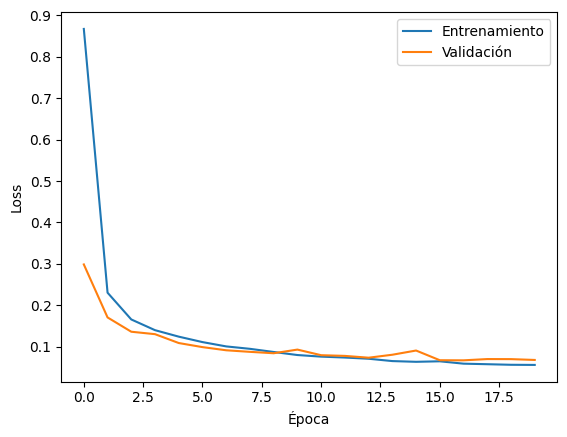

In [16]:
plt.plot(history_data.history['loss'], label="Entrenamiento")
plt.plot(history_data.history['val_loss'], label="Validación")
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc="upper right")
plt.show()

**PREGUNTA**
5. Realiza predicciones de X_test_std. Mira los valores que contiene.

In [17]:
y_pred = modelo.predict(X_test_std)
y_pred

366/366 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 3.1350669e-15, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [9.9748600e-01, 5.2313615e-22, 2.4141600e-31, ..., 5.7397670e-10,
        0.0000000e+00, 2.4061405e-33],
       [7.8845286e-20, 9.9054050e-01, 1.2190935e-13, ..., 2.2238158e-04,
        9.2067644e-03, 3.0415284e-05],
       ...,
       [0.0000000e+00, 8.2394842e-15, 9.9991000e-01, ..., 4.1568680e-12,
        2.7909612e-26, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6569030e-36, 1.7314202e-03, 6.5227601e-09, ..., 4.9403090e-12,
        9.9826860e-01, 1.9325437e-19]], dtype=float32)

**PREGUNTA**
6. Calcula el accuracy del modelo. Puedes convertir tus predicciones a one-hot con:



```
y_pred_one_hot = tf.one_hot(tf.argmax(y_pred, axis = 1), depth = 11)
```



In [18]:
y_pred_one_hot = tf.one_hot(tf.argmax(y_pred, axis = 1), depth = 11)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_one_hot)
print("Accuracy del modelo: {:.4f}".format(accuracy))


Accuracy del modelo: 0.9800


**PREGUNTA**
7. Muestra la matriz de confusión. Tendrás que convertir a categorías 0,1,2,3... Puedes usar argmax()

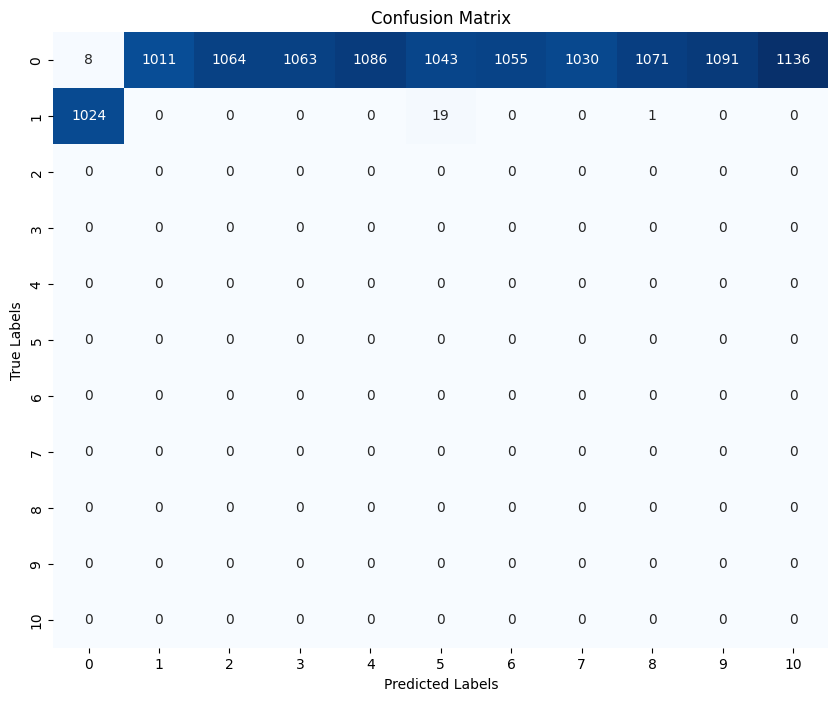

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Convertir las predicciones a índices de clase
predicted_labels = np.argmax(y_pred_one_hot, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test[0], predicted_labels)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**PREGUNTA**
8. Modifica el ejercicio usando como target la categoría en lugar de codificar con one hot.

In [31]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(15, activation='relu', input_dim=(X_train_std.shape[1])),  # Capa oculta 1
    Dense(15, activation='relu'),  # Capa oculta 2
    Dense(11, activation='softmax') ])  # Capa de salida

modelo.summary()
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history_data = modelo.fit(X_train_std, y_train, epochs=20, validation_split=0.2, batch_size=10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                735       
                                                                 
 dense_13 (Dense)            (None, 15)                240       
                                                                 
 dense_14 (Dense)            (None, 11)                176       
                                                                 
Total params: 1151 (4.50 KB)
Trainable params: 1151 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
2996/2996 [==============================] - 10s 3ms/step - loss: 0.9804 - val_loss: 0.3620
Epoch 2/20
2996/2996 [==============================] - 8s 3ms/step - loss: 0.2758 - val_loss: 0.1871
Epoch 3/20
2996/2996 [==============================] - 9s 3ms/step - loss: 0.185

In [33]:
# Realizar predicciones en el conjunto de datos de prueba
y_pred = modelo.predict(X_test_std)

# Convertir las predicciones a categorías numéricas
categorias_numericas = np.argmax(y_pred, axis=1)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, categorias_numericas)
print("Accuracy del modelo: {:.4f}".format(accuracy))


366/366 [==============================] - 1s 1ms/step
Accuracy del modelo: 0.9772


**PREGUNTA**
9. Añádele un early stopping con monitor para validation loss y comprueba si mejora el resultado (prueba distintos valores de patience). Para ello cambia a tamaño de batch = 64 y nº de épocas 200

Epoch 1/200
469/469 [==============================] - 6s 7ms/step - loss: 0.0520 - val_loss: 0.0656
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0482 - val_loss: 0.0683
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0477 - val_loss: 0.0679
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0472 - val_loss: 0.0678
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0464 - val_loss: 0.0702
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0453 - val_loss: 0.0664
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0468 - val_loss: 0.0681
Epoch 8/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0458 - val_loss: 0.0716
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0475 - val_loss: 0.0672
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0447 - val_lo

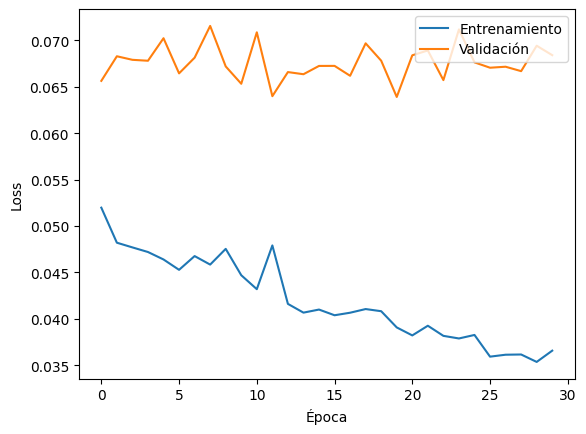

366/366 [==============================] - 1s 2ms/step
Accuracy del modelo: 0.9845


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Entrenar el modelo con Early Stopping
history_data = modelo.fit(X_train_std, y_train, epochs=200, validation_split=0.2, batch_size=64, callbacks=[early_stopping])

# Grafico de la curva de aprendizaje
plt.plot(history_data.history['loss'], label="Entrenamiento")
plt.plot(history_data.history['val_loss'], label="Validación")
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(loc="upper right")
plt.show()

#Prediccion
y_pred = modelo.predict(X_test_std)

# Convertir las predicciones a categorías numéricas
predicted_labels = np.argmax(y_pred, axis=1)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy del modelo: {:.4f}".format(accuracy))


## MNIST Numbers

**PREGUNTA**
10. Crea un modelo para la clasificación del dataset MNIST de dígitos escritos a mano. Elige la mejor opción en cuanto a arquitectura, dropout, etc...

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Se normaliza los valores de píxeles al rango [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar los datos para que tengan la forma (la forma es número de muestras, altura, anchura, canales). Explicando un poco la forma
# el primer numero -1 ajusta automaticamente el tamaño de la dimension; 28 = representa la alturade las img de MNIST en pixeles
# y el otro 28 = representa el ancho, y por ultimo 1 = escala de grises
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Trasformación de las etiquetas a one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluacion
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 43s 111ms/step - loss: 0.2769 - accuracy: 0.9211 - val_loss: 0.0699 - val_accuracy: 0.9792
Epoch 2/10
375/375 [==============================] - 45s 120ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0522 - val_accuracy: 0.9844
Epoch 3/10
375/375 [==============================] - 39s 103ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 4/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 5/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 6/10
375/375 [==============================] - 39s 104ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0456 - val_accuracy: 0.9862
Epoch 7/10
375/375 [==============================] - 39s 103ms/s

Este modelo CNN consta de tres capas de convolución con activación ReLU seguidas de capas de max-pooling para reducir la dimensionalidad. Luego, se agregan capas densas para la clasificación final.

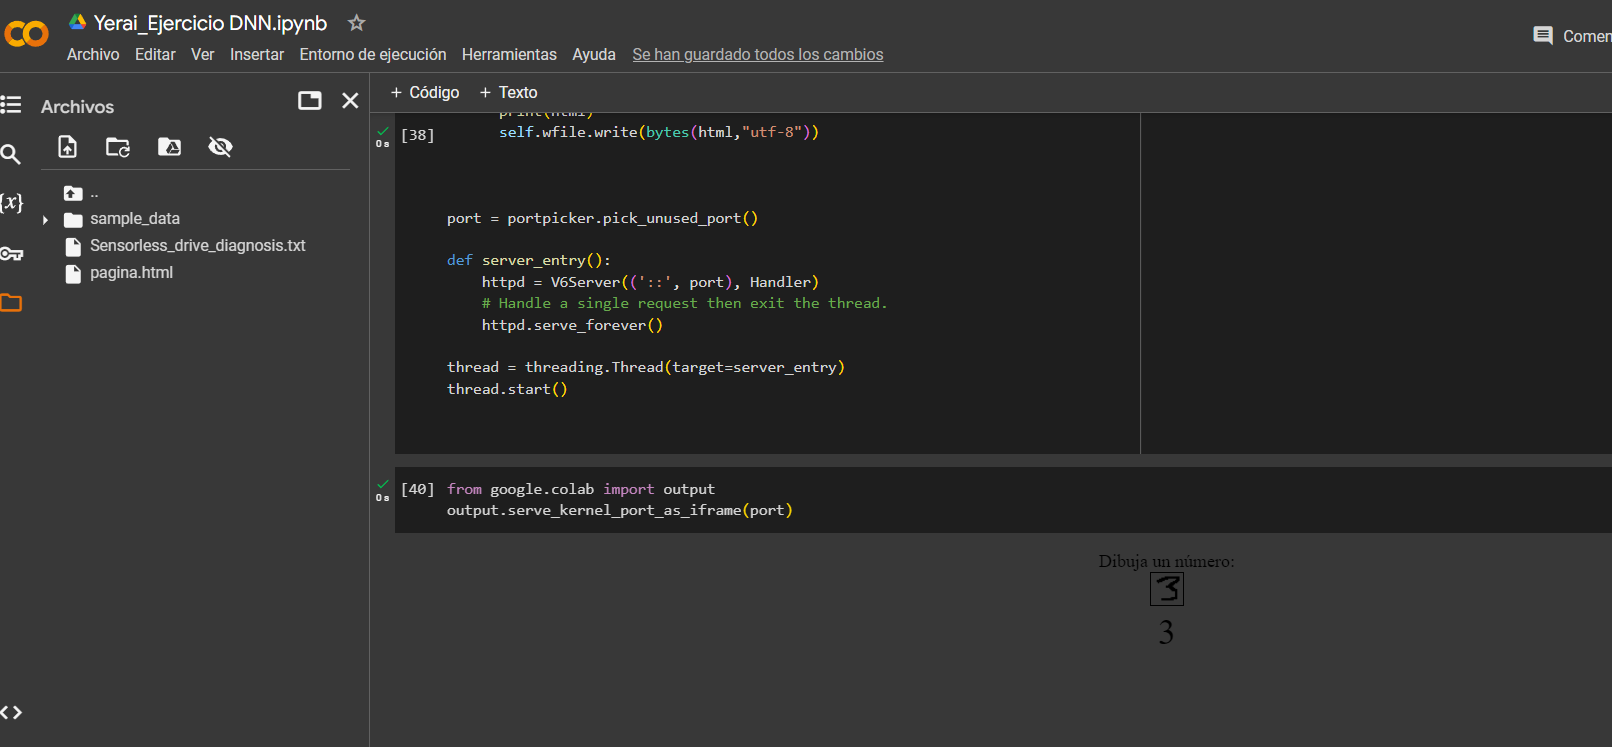

**PREGUNTA**

Comprueba el funcionamiento de tu modelo con este Javascipt para dibujar números. ¿Qué tal es el resultado? ¿Y si dibujas los números desplazados y no en el centro? ¿Por qué crees que es?

El resultado es correcto, probando con diferentes numeros es capaz de detectar el numero que se dibuja en el recuadro. Si dibujo en otra parte del cuadro que no sea en el centro, el resultado es incorrecto.

Otra Prueba  :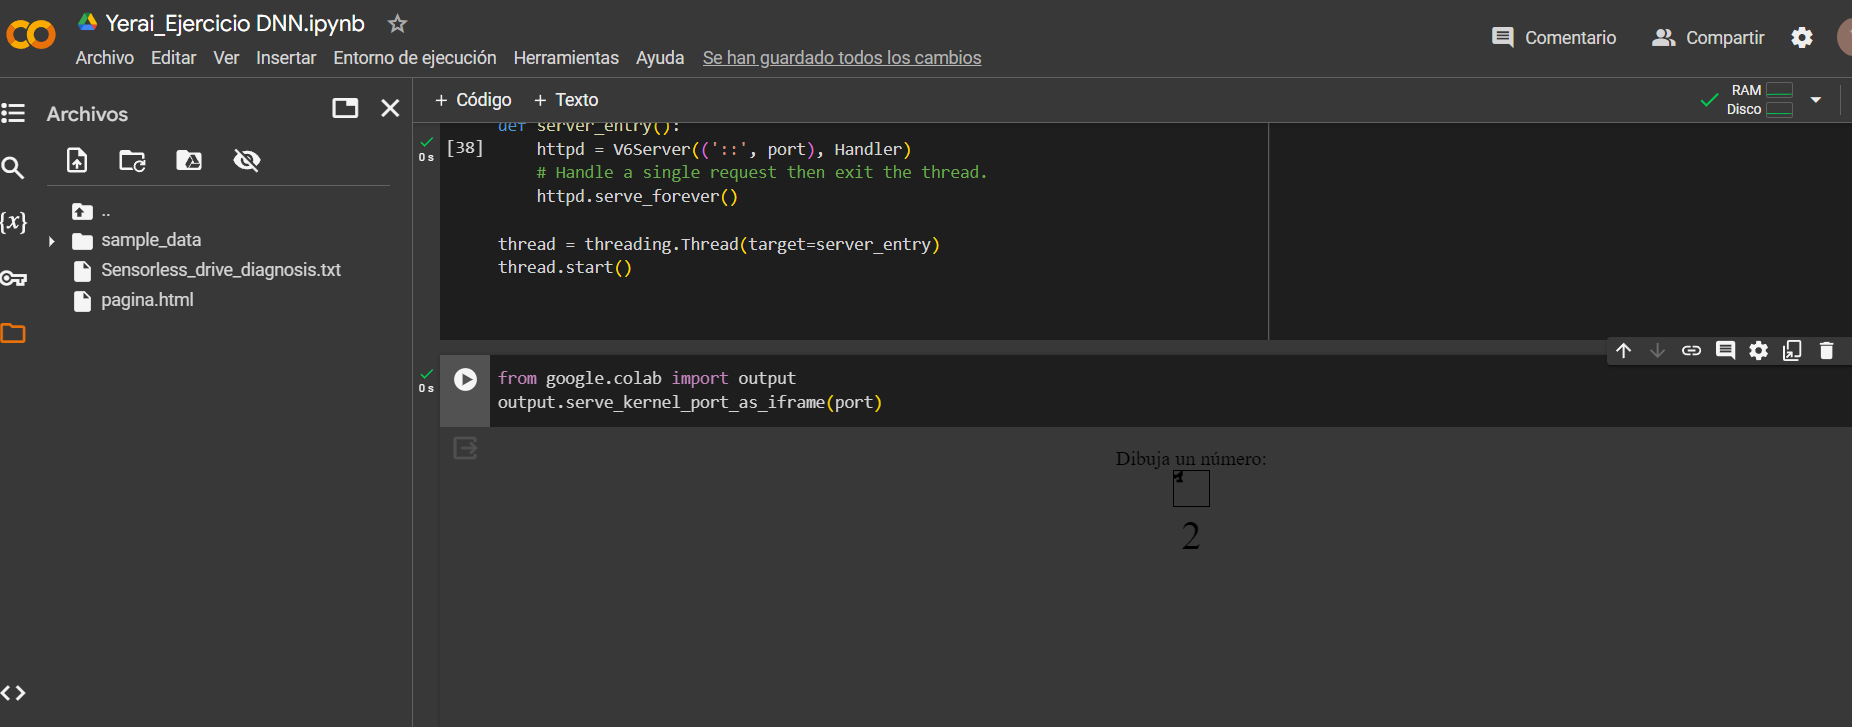

Es posible que el motivo sea por la interpretación del pixel o que no sea suficiente la cantidad de pixeles de solución identificados para el resultado correcto.

Código extraído de:

https://github.com/ringa-tech/youtube-tf-escritura/

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=c9NOx-cXDj0i

**Nota**: Sube el fichero pagina.html

In [38]:
import portpicker
import threading
import socket
import IPython
from urllib import parse

from six.moves import socketserver
from six.moves import SimpleHTTPServer

class V6Server(socketserver.TCPServer):
  address_family = socket.AF_INET6

class Handler(SimpleHTTPServer.SimpleHTTPRequestHandler):

  def do_POST(self):
    print("Peticion recibida")

    #Obtener datos de la peticion y limpiar los datos
    content_length = int(self.headers['Content-Length'])
    data = self.rfile.read(content_length)
    data = data.decode().replace('pixeles=', '')
    data = parse.unquote(data)

    #Realizar transformacion para dejar igual que los ejemplos que usa MNIST
    arr = np.fromstring(data, np.float32, sep=",")
    arr = arr.reshape(28,28)
    arr = np.array(arr)
    arr = arr.reshape(1,28,28,1)

    #Realizar y obtener la prediccion
    prediction_values = model.predict(arr, batch_size=1)
    prediction = str(np.argmax(prediction_values))
    print("Prediccion final: " + prediction)

    #Devolver respuesta a la peticion HTTP
    self.send_response(200)
    #Evitar problemas con CORS
    self.send_header("Access-Control-Allow-Origin", "*")
    self.end_headers()
    self.wfile.write(bytes("<html><head></head><body>"+prediction+"</body></html>","utf-8"))
    self.wfile.flush()

  def do_GET(self):
    self.send_response(200)
    # If the response should not be cached in the notebook for
    # offline access:
    # self.send_header('x-colab-notebook-cache-control', 'no-cache')
    self.end_headers()
    with open('pagina.html', encoding='utf8') as f:
      html = f.read()
      print(html)
      self.wfile.write(bytes(html,"utf-8"))



port = portpicker.pick_unused_port()

def server_entry():
    httpd = V6Server(('::', port), Handler)
    # Handle a single request then exit the thread.
    httpd.serve_forever()

thread = threading.Thread(target=server_entry)
thread.start()



In [45]:
from google.colab import output
output.serve_kernel_port_as_iframe(port)

<IPython.core.display.Javascript object>